In [1]:
import yaml
import numpy as np
from TraceSimulator import LongTraceSimulator
import matplotlib.pyplot as plt
from trace_IO import *


def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict

config = read_yaml_to_dict('/home/dwong/DELight_mtr/trigger_study/archive/wk11/config.yaml')
lts = LongTraceSimulator(config)



In [2]:
trace, idx= lts.generate(
            E=70,
            x=-94, y=0, z=-1800,
            no_noise=False,
            type_recoil='NR',
            quantize=True,
            phonon_only=True,
            long_trace_samples = 300000
        )
trace = trace[0]

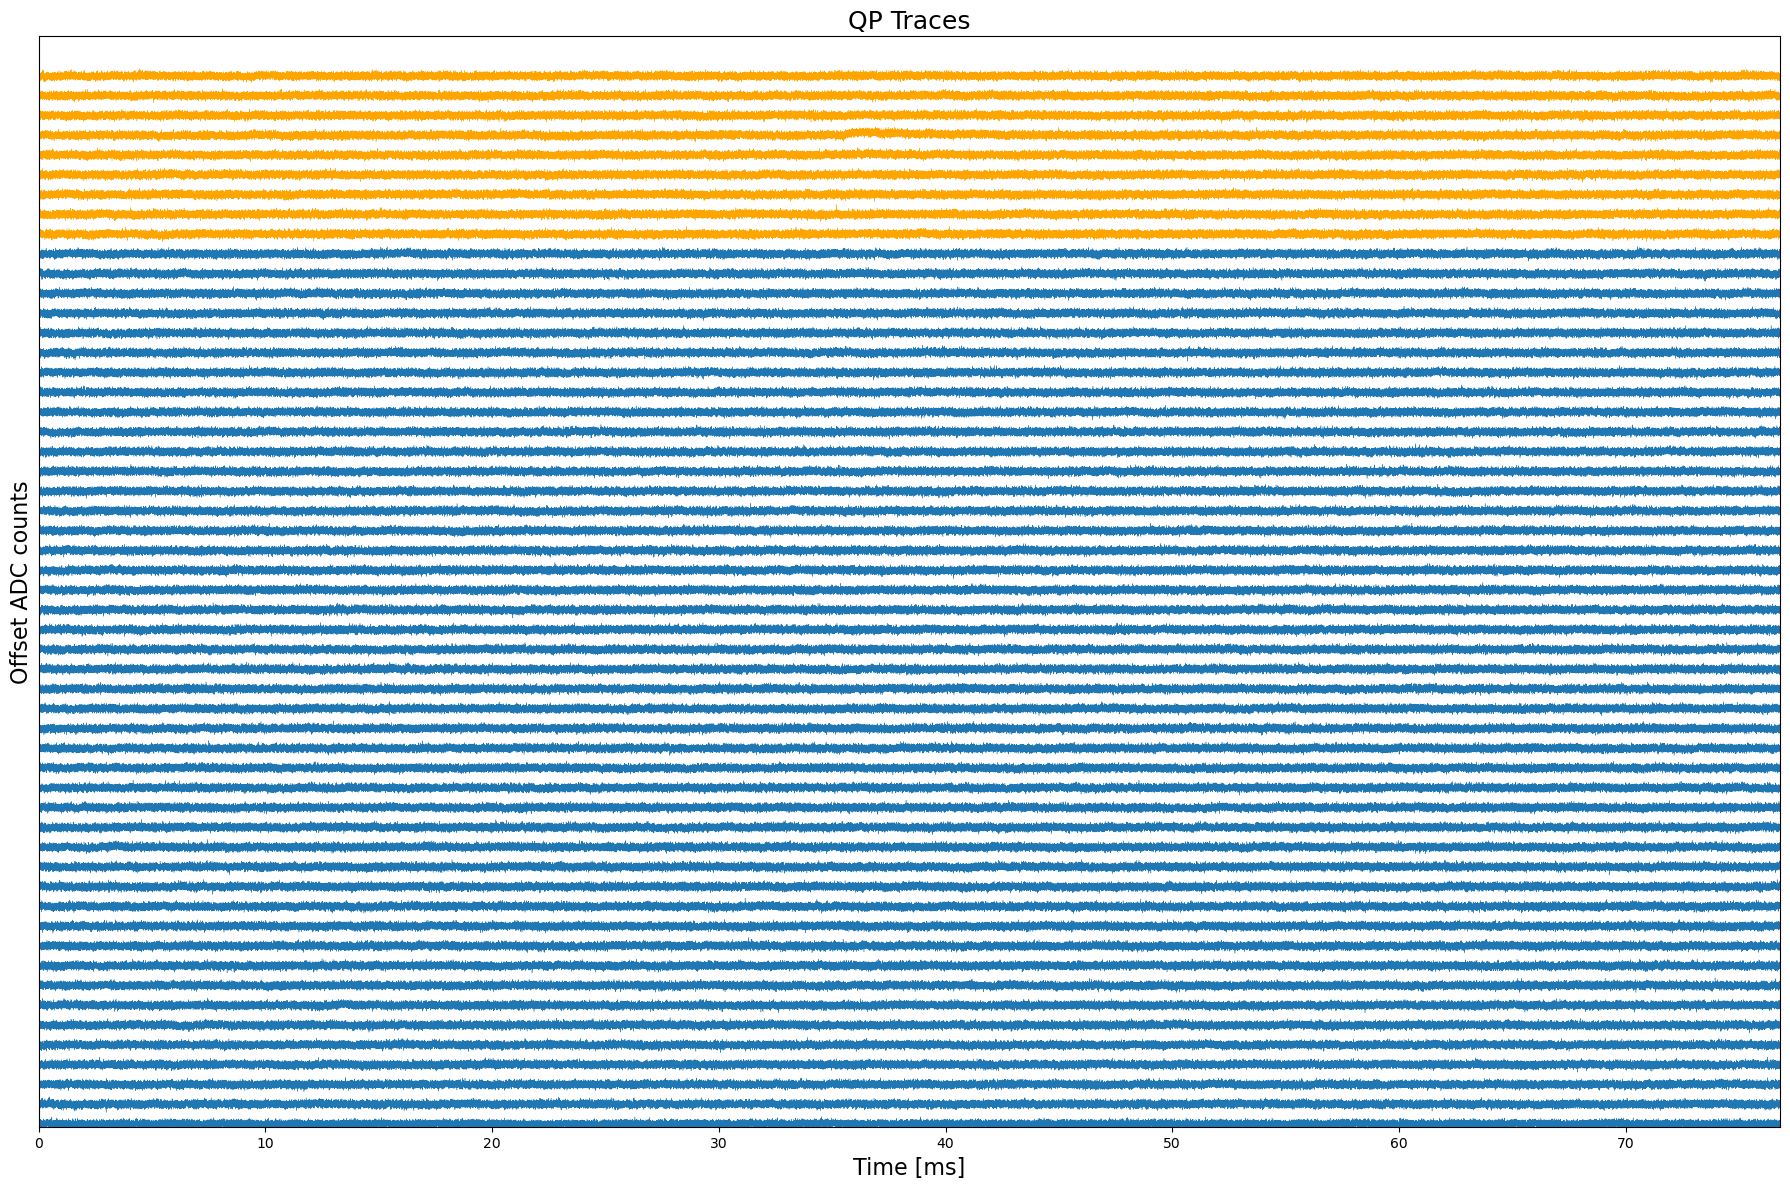

In [3]:
plot_traces(trace)

In [2]:
import numpy as np
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed
from pathlib import Path
from tqdm import tqdm


def generate_and_save_traces(energy):
    all_traces = []
    n_sets = 100
    for _ in range(n_sets):
        trace, _ = lts.generate(E=energy, x=-94, y=0, z=-1800,
            no_noise=False,
            type_recoil='NR',
            quantize=True,
            phonon_only=True,
            long_trace_samples = 300000)
        qp_trace = trace[0][-9:]
        all_traces.append(np.asarray(qp_trace, dtype=np.float16))

    output_path = Path(f"/ceph/dwong/trigger_samples/lts/traces_energy_{energy}.zst")
    save_traces_to_zstd(all_traces, output_path)


def main():
    energy_values = list(range(5, 101, 5))
    max_threads = 15

    with ThreadPoolExecutor(max_workers=max_threads) as executor:
        futures = {executor.submit(generate_and_save_traces, energy): energy for energy in energy_values}
        for _ in tqdm(as_completed(futures), total=len(futures), desc="Generating Traces"):
            pass


if __name__ == "__main__":
    main()


Generating Traces: 100%|██████████| 20/20 [11:42<00:00, 35.14s/it]  


In [14]:
loaded_trace = load_traces_from_zstd("/ceph/dwong/trigger_samples/lts/traces_energy_5.zst", 100)

In [15]:
loaded_trace.shape

(100, 9, 300000)

In [2]:
import numpy as np
import threading
from concurrent.futures import ThreadPoolExecutor, as_completed
from pathlib import Path
from tqdm import tqdm


def generate_and_save_traces(energy):
    all_traces = []
    n_sets = 100
    for _ in range(n_sets):
        trace, _ = lts.generate(E=energy, x=-94, y=0, z=-1800,
            no_noise=False,
            type_recoil='NR',
            quantize=True,
            phonon_only=True,
            long_trace_samples = 300000)
        qp_trace = trace[0][-9:]
        all_traces.append(np.asarray(qp_trace, dtype=np.float16))

    output_path = Path(f"/ceph/dwong/trigger_samples/lts/traces_energy_{energy}.zst")
    save_traces_to_zstd(all_traces, output_path)
    
generate_and_save_traces(0)